# Reporte: Caso *Data Science Analyst*

## Introducción

Este *Jupyter Notebook* presenta el análisis y las conclusiones del caso *Data Science Analyst*, utilizando técnicas de análisis de datos y *machine learning* para explorar un conjunto de datos proporcionado.

---

## Desarrollo del Caso

### 1. Análisis Exploratorio de Datos (EDA)
Realización de un *Exploratory Data Analysis* para comprender las características y relaciones en el conjunto de datos.

### 2. Construcción de Modelos Predictivos
Desarrollo de modelos para predecir métricas relevantes, evaluando su rendimiento mediante métricas específicas.

### 3. Optimización de Hiperparámetros
Mejora del rendimiento de los modelos a través de la optimización de hiperparámetros.

### 4. Técnicas de *Clustering*
Aplicación de *clustering* para identificar patrones o segmentos en los datos.

### 5. Aprendizaje No Supervisado
Uso de técnicas de aprendizaje no supervisado para descubrir *insights* ocultos en datos sin etiquetar.


###### Nota 1: Si bien este reporte contiene información relevante y conclusiones clave, en las carpetas dentro de este repositorio/folder se encuentran todos los *outcomes*, *intermediates*, código y archivos relevantes para un análisis más detallado. Se recomienda revisar estos materiales complementarios para obtener una comprensión más profunda del proyecto.

###### Nota 2: Para archivos intercativos como el EDA-Profiling y las 2D/3D Scatter... es posible que no se puedan visualizar desde GitHub o PDF, por lo que se recomienda descargar los archivos HTML ubicados en outcomes/EDA y outcomes/model respectivamente para abrirlos en un navegador.





---

#### 1. Análisis Exploratorio de Datos

Se realizó un Análisis Exploratorio de los datos utilizando *Profiling* y otras herramientas de visualización. Los resultados más relevantes de este análisis se resumen a continuación y se pueden explorar en detalle en el [informe completo de Profiling-EDA](../../outcomes/EDA/EDA_report.html), accesible tanto desde un navegador como Chrome o directamente desde el link proporcionado.

**Principales Hallazgos:**

1. ***Outliers* en 'Profit' y 'Sales'**: Las variables numéricas 'Profit' y 'Sales' presentan *outliers* significativos, indicando valores muy alejados de la media. Estos se observan claramente en la matriz de gráficas y en los gráficos de caja.

    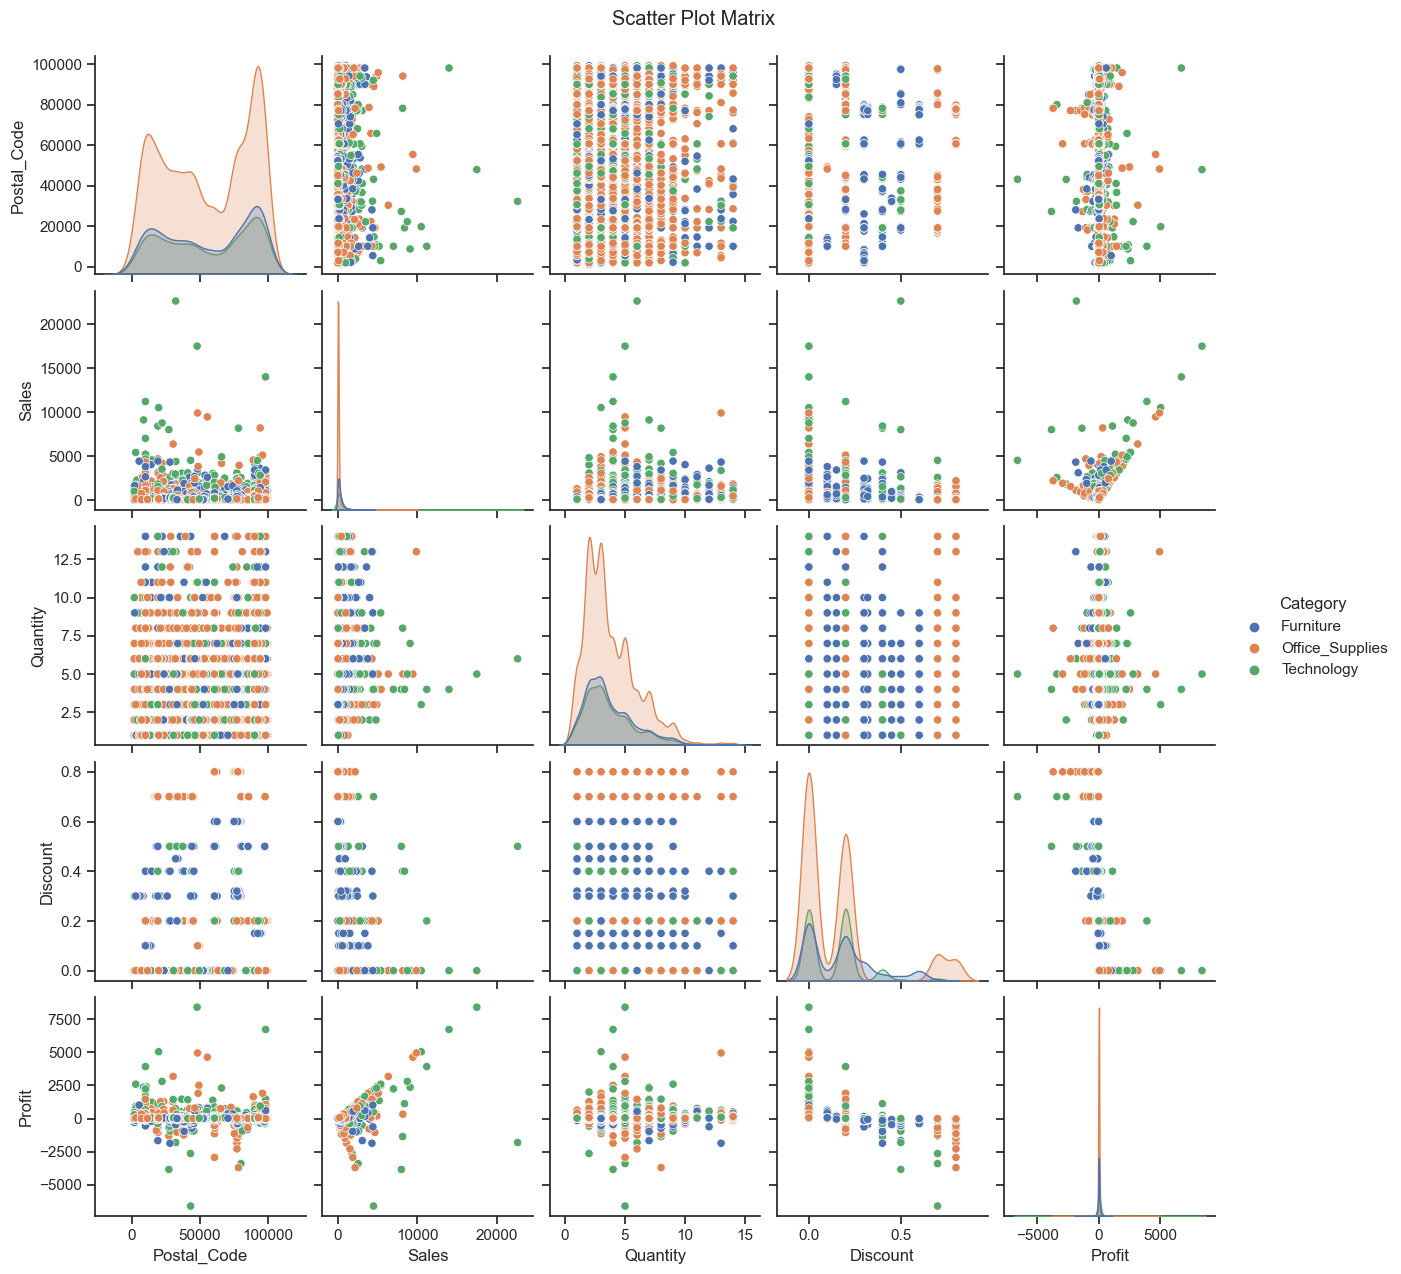
    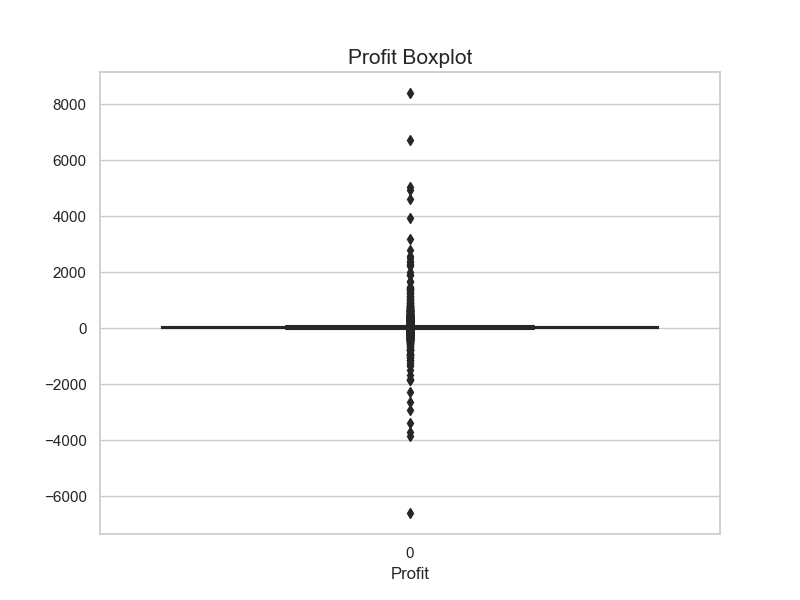
    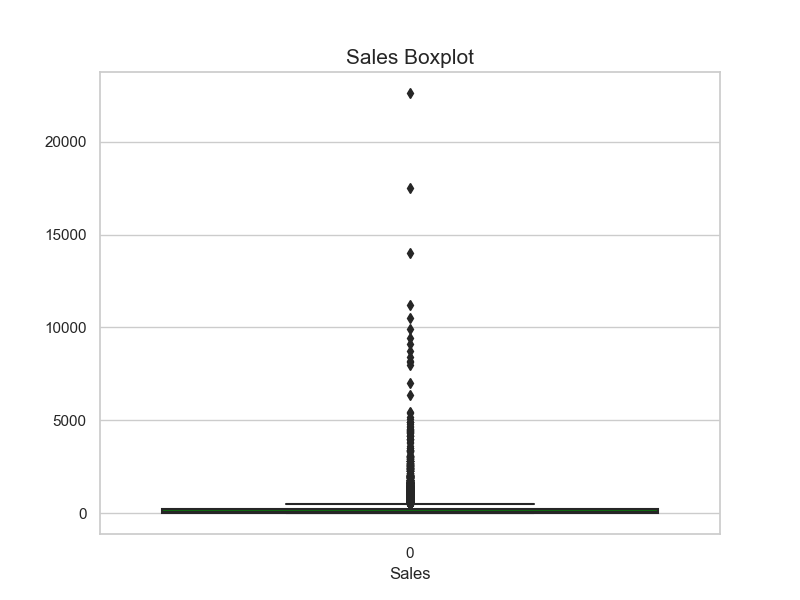

2. **Relaciones entre Variables**:
    - Existe una relación positiva entre 'Profit' y 'Sales', lo cual es intuitivamente esperado: a medida que aumentan las ventas, también lo hace el ingreso.
    - Se identifica una relación negativa entre 'Profit' y 'Discount', así como entre 'Sales' y 'Discount', sugiriendo que los descuentos pueden afectar negativamente el ingreso, aunque la relación entre descuentos y ventas es más compleja y requiere un análisis más detallado.

3. **Matriz de Correlación**:
    - La matriz de correlación revela fuertes correlaciones entre diversas variables, destacando especialmente la relación positiva entre 'Profit' y 'Sales', y negativa entre 'Profit' y 'Discount'. Sin embargo, no se observa una correlación directa entre 'Sales' y 'Discount', lo que indica que la influencia de los descuentos en las ventas puede estar mediada por otros factores.

    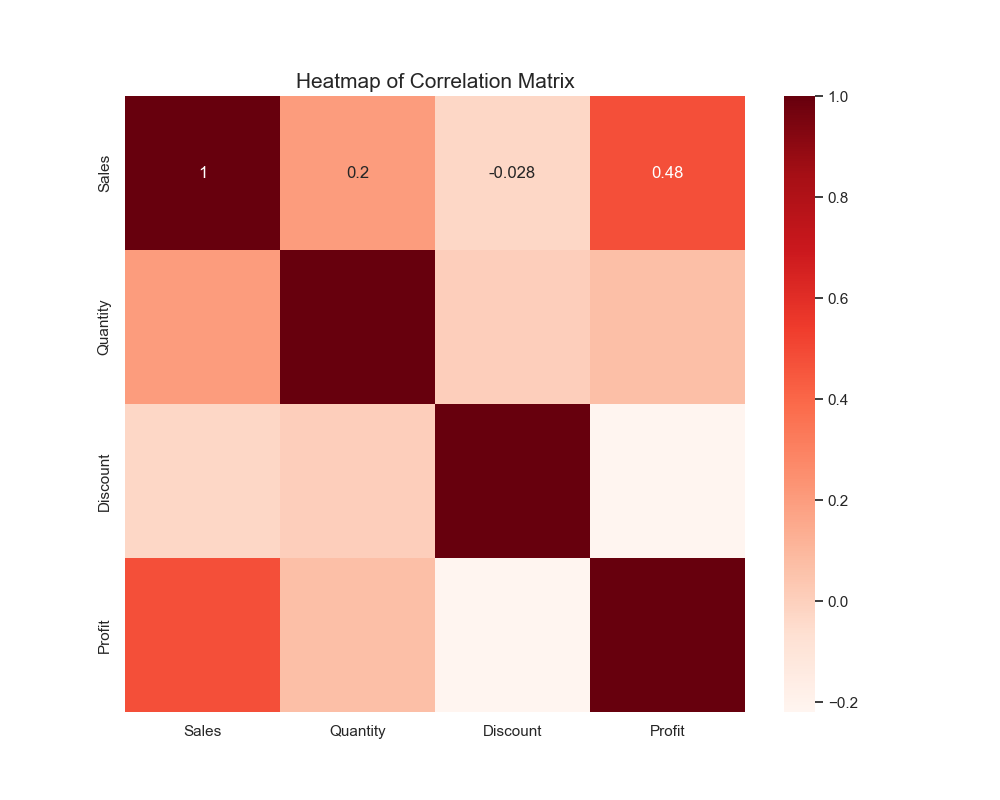

4. **Análisis por Estado**:
    - Al explorar más a fondo los datos, se nota que la mayor cantidad de ventas en ciertos estados no necesariamente se traduce en un mayor ingreso, como se observa en los casos de Texas y Pennsylvania. Esto sugiere que la eficiencia de las ventas y las estrategias de descuento pueden variar significativamente entre diferentes regiones.

    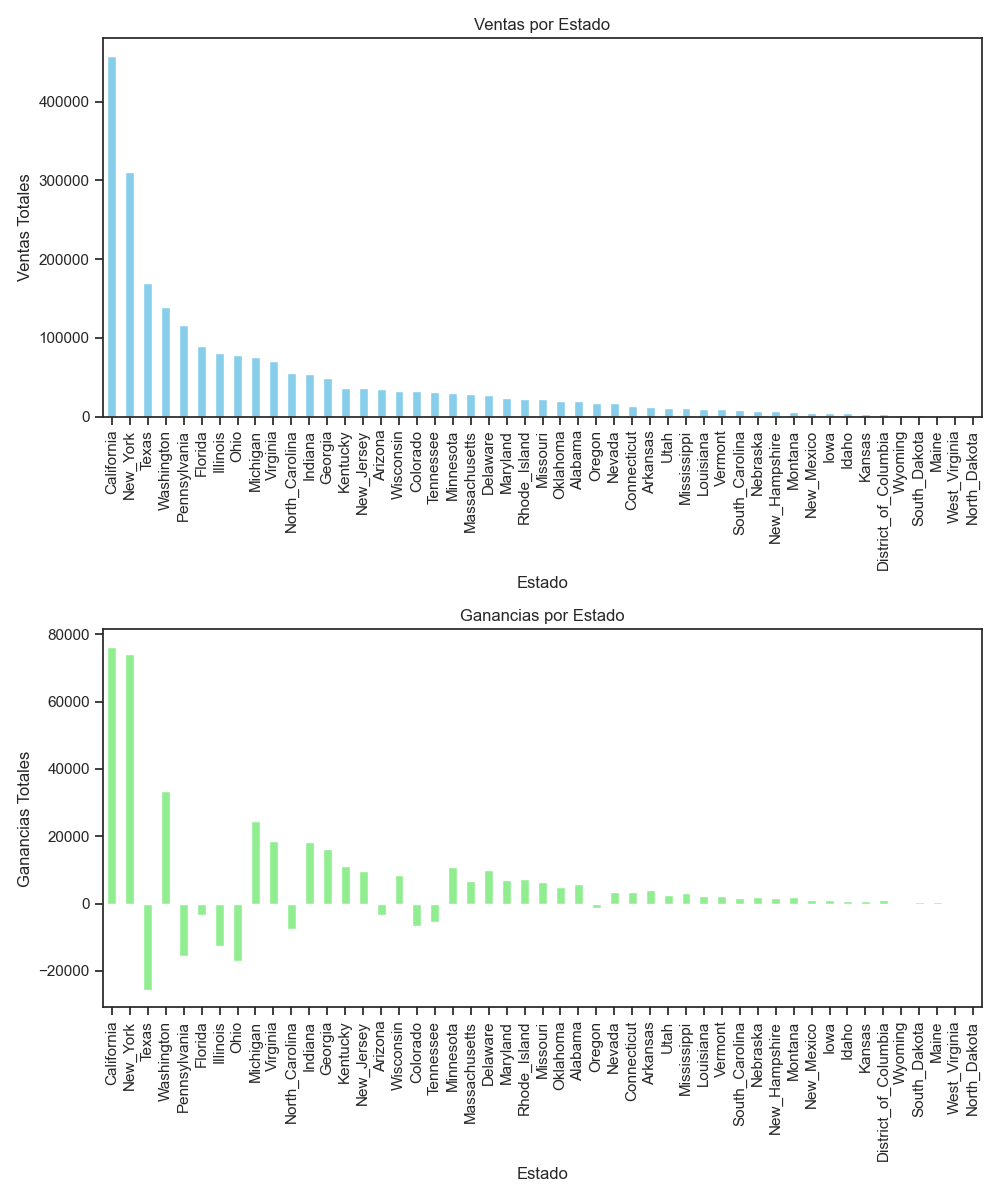

**Conclusión del Análisis Exploratorio**:

Este análisis nos permite identificar áreas clave para la limpieza y preprocesamiento de los datos, sentando las bases para la construcción de modelos predictivos. Nuestro objetivo será predecir efectivamente la variable 'Profit', utilizando los insights obtenidos para informar nuestro enfoque en el modelado.

---

Procederemos ahora con la limpieza y preprocesamiento de los datos para luego desarrollar y afinar modelos predictivos que nos permitan alcanzar nuestros objetivos de análisis.


##### 1.1 Limpieza de Datos

En la etapa de limpieza y preprocesamiento de los datos, se tomaron medidas importantes para asegurar la calidad y la relevancia del conjunto de datos para el análisis posterior. Los pasos llevados a cabo fueron los siguientes:

1. **Eliminación de Duplicados**: Se removieron todas las observaciones duplicadas para asegurar la unicidad de los datos.
2. **Eliminación de Variables No Explicativas**: Se eliminó una variable que contenía una única categoría, en este caso el país, ya que no aportaba información explicativa relevante para el análisis.
3. **Eliminación de Variables Categóricas Altamente Correlacionadas**: Se eliminaron variables categóricas que estaban altamente correlacionadas entre sí, así como aquellas con un alto nivel de granularidad, como el código postal y la ciudad, para evitar confusiones y redundancias al momento de predecir la variable objetivo.
4. **Tratamiento de *Outliers***: Se decidió aplicar un método basado en la desviación estándar para identificar y eliminar los valores extremos. Este método asume una distribución normal de los datos y utiliza un enfoque global, basándose en la media ($\mu$) y la desviación estándar ($\sigma$) de la columna para determinar los límites de normalidad.

    La fórmula utilizada para identificar *outlier*s es la siguiente:

    - Un valor $x$ se considera un outlier si:

        $$x < \mu - k \cdot \sigma$$
        $$x > \mu + k \cdot \sigma$$

    donde $k$ es un factor que determina el umbral de corte. Los valores típicos para $k$ pueden variar entre 2 y 3, dependiendo de la rigurosidad deseada en la identificación de *outliers.*

Este enfoque para el tratamiento de *outliers*, aunque no es el único ni necesariamente el mejor para todos los casos, proporciona una base sólida para la limpieza de los datos, permitiendo un análisis posterior más fiable y preciso.

---

#### 2. Construcción de Modelos

Decidimos elegir modelos basados en árboles (XGBoost, Random Forest, Gradient Boosting) por su capacidad para manejar mejor la asimetría y los *outliers* en comparación con los modelos lineales (Linear Regression, Ridge, Lasso, Elastic Net).

Los 9 modelos predictivos seleccionados fueron:

1. Linear Regression
2. RandomForestRegressor
3. DecisionTreeRegressor
4. GradientBoostingRegressor
5. ElasticNet
6. SVR
7. Lasso
8. Ridge
9. XGBRegressor

La variable dependiente seleccionada es 'Profit', y las variables explicativas incluyen: 'Ship Mode', 'Segment', 'State', 'Category', y 'Sub-Category'. 



### 2.1 Evaluación de Rendimiento:

Para evaluar el rendimiento de los modelos, utilizamos el RMSE (Root Mean Squared Error o Raíz del Error Cuadrático Medio).

El RMSE es una métrica utilizada para evaluar la diferencia entre los valores predichos por un modelo y los valores reales. Al elevar al cuadrado los errores, el RMSE castiga más fuertemente los errores grandes, lo cual es útil en situaciones donde estos errores son particularmente inaceptables.

La fórmula para calcular el RMSE es:

$$
RMSE = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}
$$

Donde:
- $n$ es el número total de observaciones.
- $y_i$ es el valor real de la i-ésima observación.
- $\hat{y}_i$ es el valor predicho por el modelo para la i-ésima observación.
- $\sum_{i=1}^{n} (y_i - \hat{y}_i)^2$ es la suma de los cuadrados de las diferencias entre los valores reales y predichos.

Un valor de RMSE más bajo indica un mejor ajuste del modelo a los datos, siendo 0 el ajuste perfecto.

Los resultados obtenidos para cada modelo son los siguientes:

\begin{array}{lc}
\hline
\textbf{Modelo} & \textbf{RMSE} \\
\hline
\text{XGBoost} & 40.048602 \\
\text{Random Forest} & 40.770540 \\
\text{Gradient Boosting} & 41.965001 \\
\text{Decision Tree} & 50.252743 \\
\text{Linear Regression} & 68.881074 \\
\text{Ridge} & 68.903740 \\
\text{Lasso} & 71.772609 \\
\text{Elastic Net} & 77.275024 \\
\text{SVC} & 79.580536 \\
\hline
\end{array}

Teniendo en cuenta la distribución, características y estadísticas de nuestros datos observadas en el EDA, podemos concluir que estos valores representan un buen punto de partida.

---

#### 3. Optimización de Hiperparámetros

Para mejorar el rendimiento de los tres mejores modelos, se empleó una combinación de validación cruzada y `GridSearchCV`. Este proceso implicó definir una cuadrícula de valores posibles para los hiperparámetros y luego realizar una búsqueda exhaustiva con `GridSearchCV`, evaluando cada combinación de hiperparámetros mediante validación cruzada. Se seleccionó la combinación que ofreció el mejor rendimiento según RMSE, MAE y R2, permitiendo encontrar la configuración óptima que condujo a una mejora significativa en las predicciones.

Los resultados de la optimización son los siguientes:

\begin{array}{|l|c|c|c|}
\hline
\textbf{Modelo} & \textbf{Test RMSE} & \textbf{Test MAE} & \textbf{Test R2} \\
\hline
\text{XGBoost} & 39.42 & 14.15 & 0.81 \\
\text{Gradient Boosting} & 36.19 & 13.68 & 0.84 \\
\text{Random Forest} & 40.40 & 15.02 & 0.80 \\
\hline
\end{array}

El modelo *Gradient Boosting* mostró el mejor rendimiento global, destacando por su equilibrio entre precisión y capacidad de generalización.

A continuación, se presenta un gráfico de dispersión que ilustra la relación entre los valores reales y los predichos por el modelo *Gradient Boosting*:

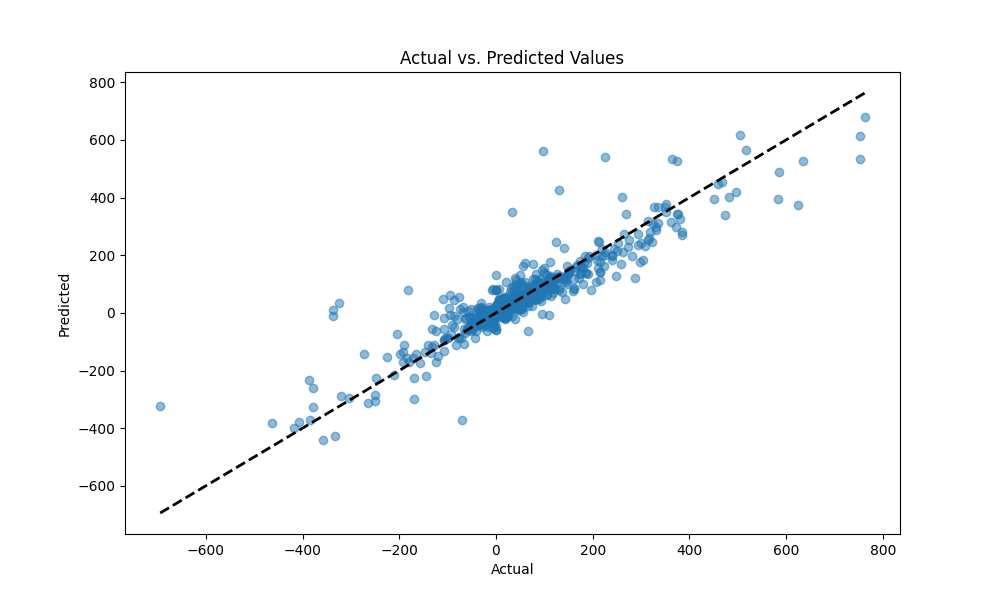


A pesar de algunas desviaciones, la mayoría de los puntos se alinean cerca de la línea de 45 grados, indicando predicciones precisas en general. Sin embargo, la dispersión aumenta para valores menos comunes, sugiriendo áreas de posible mejora.

Además, el siguiente gráfico de densidad compara las distribuciones de los valores reales y predichos, ayudando a evaluar la presencia de sesgos en el modelo:

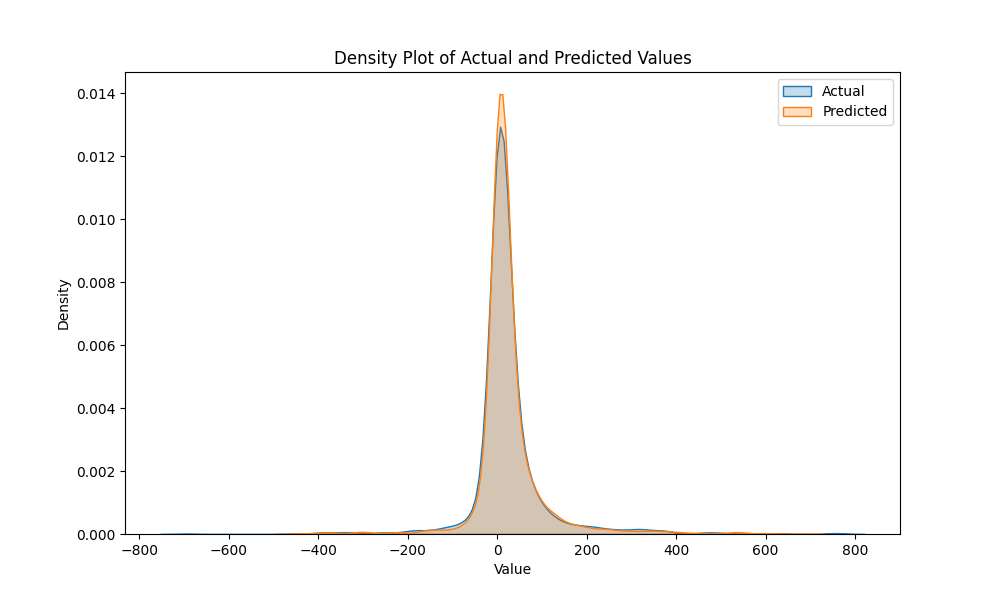

Los modelos fueron entrenados con configuraciones de hiperparámetros que equilibran la convergencia y la eficiencia computacional. Aunque ya muestran resultados prometedores, aún existen oportunidades de mejora mediante ajustes adicionales en los hiperparámetros o cambios en la formulación (forma funcional) del modelo.

---

### 4. Técnicas de *Clustering*

Utilizamos la técnica de *K-Means* para agrupar los datos en *clusters* basados en la similitud de características. Aplicamos el método del codo (*Elbow Method*) para determinar el número óptimo de *clusters*, resultando en la selección de 6 *clusters*. Los resultados se visualizaron mediante gráficos de dispersión 3D y diagramas de caja, permitiendo una comprensión más profunda de las características de cada *cluster*.

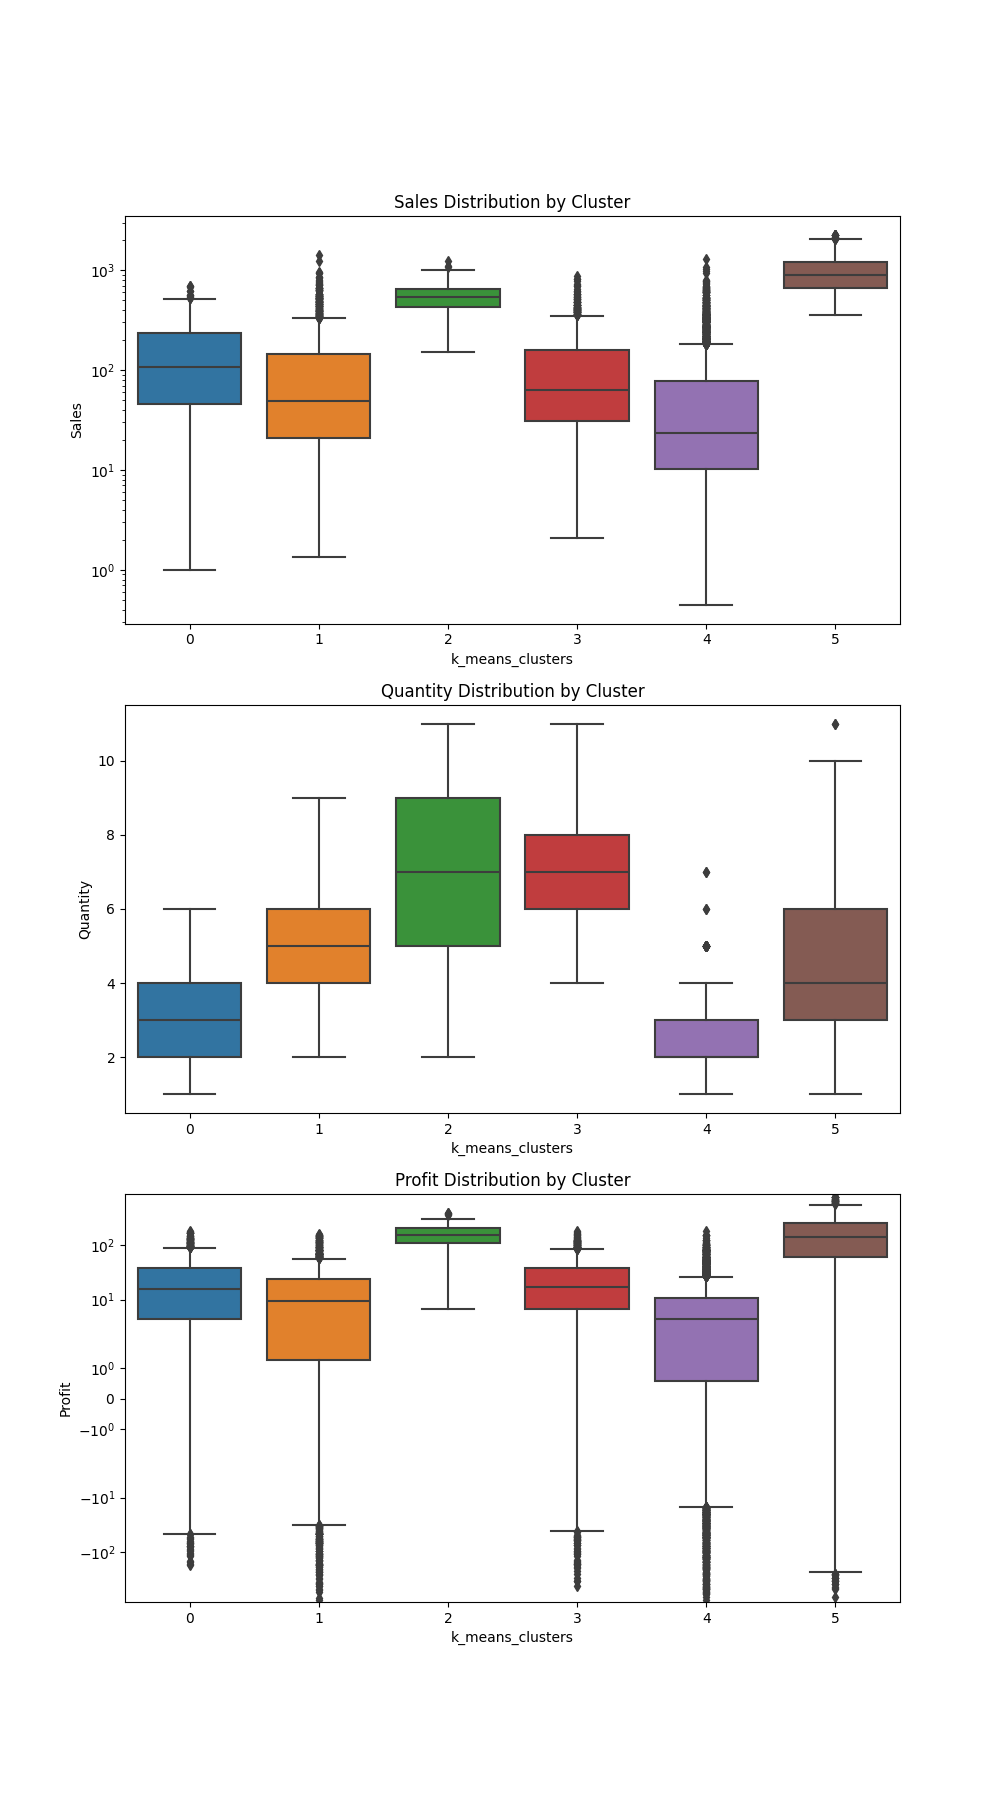

Para una exploración interactiva, se proporcionan los siguientes enlaces a gráficos de dispersión y 3D:

- [*Scatter Sales vs Profit*](../../outcomes/cluster/Sales_v_Quant.html)
- [*Scatter Sales vs Quantity*](../../outcomes/cluster/Sales_v_Quant.html)
- [3D *Scatter Sales vs Profit vs Region*](../../outcomes/cluster/Sales_v_Profit_v_Region.html)
- [3D *Scatter Sales vs Profit vs Ship Mode*](../../outcomes/cluster/Sales_v_Profit_v_Ship.html)
- [3D *Scatter Sales vs Profit vs Sub-Category*](../../outcomes/cluster/Sales_v_Profit_v_Sub-cat.html)

#### Interpretaciones

**Ventas (*Sales*):**
- *Cluster* 5 muestra un promedio de ventas significativamente más alto, indicando posibles compras de alto valor.
- *Cluster* 2 también tiene un promedio de ventas alto, representando otro segmento de transacciones valiosas.

**Cantidad (*Quantity*):**
- *Clusters* 3 y 2 presentan los promedios más altos, sugiriendo pedidos de mayoreo o compras en volumen.

**Descuento (*Discount*):**
- La variabilidad en los niveles promedio de descuento entre *clusters* no muestra una tendencia clara que distinga significativamente a un *cluster* de los otros.

**Ganancias (*Profit*):**
- *Cluster* 5 destaca por sus altas ganancias, sugiriendo alta rentabilidad además de altas ventas.
- *Cluster* 2 también muestra ganancias relativamente altas, reforzando su posición como un segmento de alto valor.

#### Conclusiones
- **Clusters de Alto Valor:** *Cluster* 5 y *Cluster* 2 se destacan por sus altas ventas y ganancias, indicando clientes o transacciones de alto valor.
- **Clusters de Volumen:** *Cluster* 3 parece representar compras en mayor cantidad, posiblemente asociadas a clientes corporativos o compras al por mayor.
- **Clusters de Menor Valor y Mayor Cantidad:** *Cluster* 1 indica productos más económicos o compras frecuentes de menor valor.

#### Detección de Anomalías con *LOF*
Además del *clustering*, se aplicó el algoritmo *Local Outlier Factor* (*LOF*) para identificar puntos atípicos basados en la densidad local. Esto permitió analizar la presencia de *outliers* en relación con los *clusters* definidos por *K-Means*.

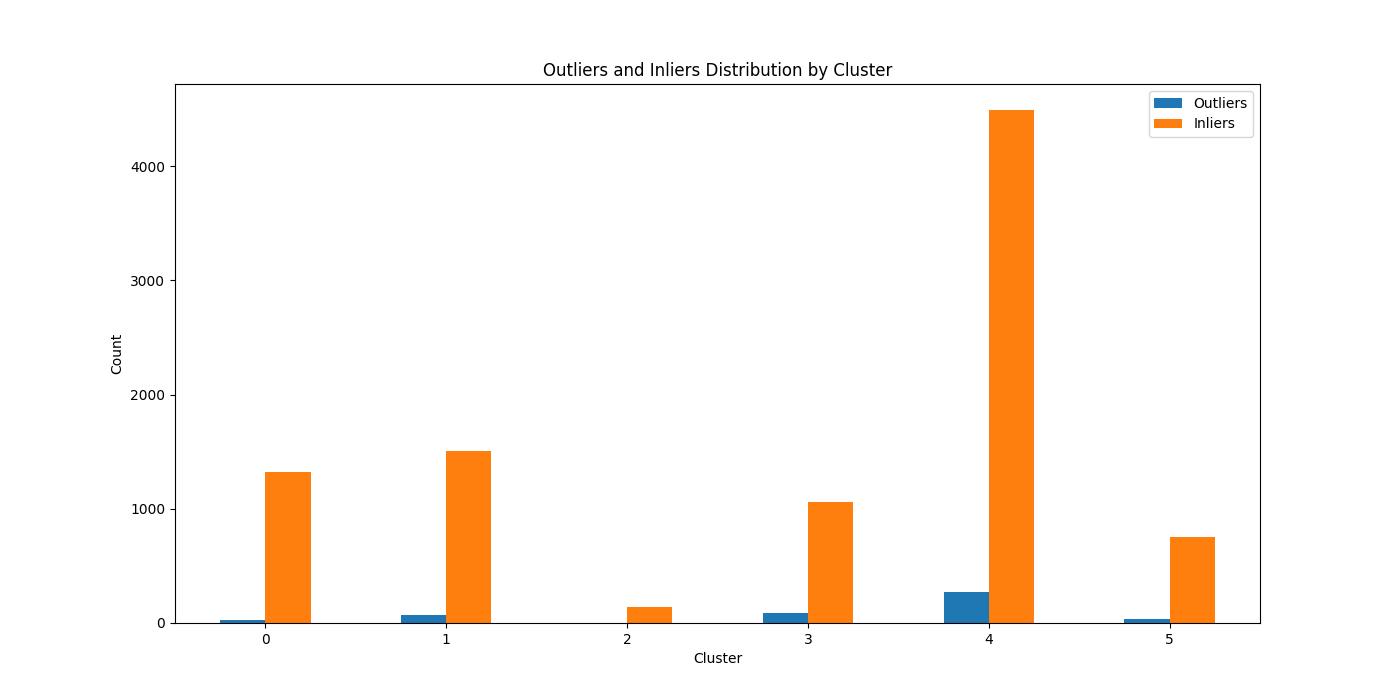

Los resultados indican que los *outliers* no se concentran sistemáticamente en un *cluster* específico, ofreciendo una distribución más dispersa a través de los diferentes grupos.

---




### 4. Aplicación de Técnicas de Aprendizaje No Supervisado para Descubrir Insights Ocultos en los Datos Sin Etiquetar

El aprendizaje no supervisado ofrece herramientas poderosas para analizar datos sin etiquetar, revelando patrones, agrupaciones y relaciones que no son inmediatamente evidentes. A continuación, se describen tres enfoques clave que podríamos aplicar para descubrir estos *insights* ocultos:

#### *Clustering* con DBSCAN
- **Descripción**: Utilizaríamos *DBSCAN* para identificar agrupaciones naturales y patrones en los datos basándonos en la densidad. Este algoritmo es particularmente útil para detectar la forma y el número de *clusters* sin necesidad de especificarlos manualmente y es capaz de manejar *outliers*, ofreciendo una visión clara de la estructura de los datos.

#### Reducción de Dimensionalidad con *PCA*
- **Descripción**: Aplicaríamos *PCA* (Análisis de Componentes Principales) para reducir la complejidad de los datos, transformándolos a un espacio de menor dimensión mientras se retiene la mayor cantidad posible de la información original. Esto no solo facilita la visualización y comprensión de la estructura de los datos sino que también ayuda a identificar patrones y relaciones entre variables.

#### Reglas de Asociación
- **Descripción**: Usaríamos algoritmos como *Apriori* para encontrar reglas de asociación en los datos. Este enfoque permite descubrir relaciones interesantes y no obvias entre las variables, siendo especialmente valioso en conjuntos de datos de transacciones o eventos, donde se pueden identificar patrones de compra o comportamiento común.



Al utilizar estos métodos, podemos crear perfiles interesantes de *buyer persona* que revelen patrones comunes en los rasgos y hábitos de compra de los clientes. Esto proporciona a las empresas una comprensión más profunda de las necesidades y preferencias de sus clientes, permitiéndoles alinear sus productos y servicios de manera más efectiva con las expectativas del mercado.

**Aplicación Práctica**: Mediante la aplicación de técnicas como *K-Means*, *DBSCAN* o análisis de componentes principales (*PCA*), podemos agrupar a los clientes en segmentos basados en diversas características. Estos segmentos nos permiten identificar *buyer personas* específicas, es decir, representaciones semi-ficticias de nuestros clientes ideales basadas en datos reales y patrones de comportamiento.

**Beneficios**: Esta segmentación ayuda a las empresas a:
  - Diseñar campañas de marketing más dirigidas y personalizadas.
  - Desarrollar productos o servicios que mejor satisfagan las necesidades de segmentos específicos.
  - Mejorar la satisfacción y lealtad del cliente mediante experiencias más personalizadas.
  - Identificar nuevas oportunidades de mercado o nichos aún no explotados.

En conclusión, la segmentación de clientes mediante el aprendizaje no supervisado no solo mejora la comprensión de la base de clientes actual sino que también abre puertas a la innovación y al crecimiento estratégico, llevando de manera efectiva la oferta con la demandas.